# Imports

In [11]:
import pandas as pd
import numpy as np
from pathlib import Path
import glob
import os
import matplotlib.pyplot as plt
import plotly_express as px
from wordcloud import WordCloud
import holoviews as hv
from text_processor import process_text
pd.options.plotting.backend = 'hvplot'

# Load Data

In [12]:
# Load CSVs for TOP WORDS dataframe

# Set directory path
path = r'top_words'

# Read csvs into dataframe
all_files = glob.glob(os.path.join(path, "*.csv"))
df_from_each_file = (pd.read_csv(f, sep=',',) for f in all_files)
df_merged = pd.concat(df_from_each_file)
df_grouped = df_merged.groupby(by='Word').sum().sort_values(by='Count', ascending=False)
df_top_words = df_grouped
df_top_words.head()

,Count
Word,
like,747
love,558
got,504
know,496
yeah,477


In [13]:
# Load CSVs for SENTIMENTS dataframe

# Set directory path
path = r'sentiment'

# Read csvs into dataframe
all_files = glob.glob(os.path.join(path, "*.csv"))
df_from_each_file = (pd.read_csv(f, sep=',',) for f in all_files)
df_merged = pd.concat(df_from_each_file)
df_sentiments = df_merged.groupby(by='Sentiment').sum().sort_index(ascending=False)
df_sentiments

,Count
Sentiment,
Positive,172
Negative,72


In [14]:
# Load CSVs for NAMED ENTITIES dataframe

# Set directory path
path = r'entities'

# Read csvs into dataframe
all_files = glob.glob(os.path.join(path, "*.csv"))
df_from_each_file = (pd.read_csv(f, sep=',',) for f in all_files)
df_merged = pd.concat(df_from_each_file).set_index('Genre')
df_sorted = df_merged.sort_values(by='Count', ascending=False)
df_sorted.head(20)

,Named_Entity,Count
Genre,,
Hip-Hop,PERSON,187
Hip-Hop,ORG,153
Country,PERSON,108
Hip-Hop,GPE,107
Rock,PERSON,90
RnB,PERSON,83
Pop,PERSON,76
Pop,DATE,73
Hip-Hop,CARDINAL,68


In [15]:
# Generate new Dataframe with columns for count of each genre

genres = df_sorted.index.unique().tolist()

# create empty dataframe
df = pd.DataFrame({'Entities': df_sorted['Named_Entity'].unique().tolist()}).set_index('Entities')

# loop through dataframe columns (genres) to generate new dataframe
for genre in genres:
    entities = df_sorted.loc[f'{genre}']['Named_Entity'].tolist()
    genre_count = df_sorted.loc[f'{genre}']['Count'].tolist()
    genre_col = pd.DataFrame({'Entities': entities, f'{genre}': genre_count}).set_index('Entities')
    df = pd.concat([df,genre_col], axis = 1)

df=df.fillna(0) # convert NaNs to zeros

def convert_df_to_integers(df):
    for col in df.columns:
        df[col] = df[col].astype(int)
    return df

df_entities = convert_df_to_integers(df)
df_entities

,Hip-Hop,Country,Rock,RnB,Pop,EDM
Entities,,,,,,
PERSON,187,108,90,83,76,65
ORG,153,51,57,41,26,23
GPE,107,60,19,35,34,38
DATE,31,21,46,45,73,7
CARDINAL,68,57,21,27,32,19
TIME,21,32,33,34,35,51
WORK_OF_ART,14,4,10,20,12,4
NORP,6,3,9,17,3,6
PRODUCT,13,9,9,6,17,0


# TOP WORDS

In [16]:
# Display top 50 words for all music genres
df_top_words.iloc[:50].plot.bar(rot=90, width=1200, color='Count').opts(fontscale=1.3)

:Bars   [Word]   (Count)

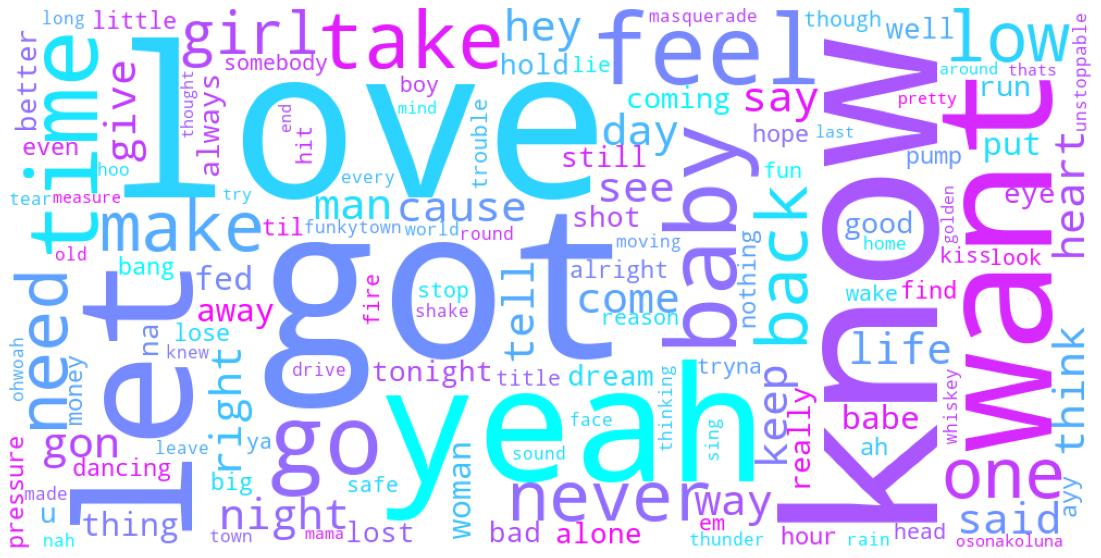

In [17]:
# Generate Word Cloud for TOP WORDS

big_string = ' '.join(df_top_words.index.tolist())
top_words_text = process_text(big_string, {'lololow', 'ooh'})

wc = WordCloud(width=1000, height=500, background_color="white", colormap="cool").generate(' '.join(top_words_text))
plt.figure(figsize=(20,10))
plt.axis("off")
plt.imshow(wc)

# Named Entities

In [18]:
df_entities.plot.bar(
    width=1200, 
    height = 600, 
    rot =45, 
    title = f'Top Named Entities found in All Genres',
    stacked = True,
    legend= 'top_right'
    ).opts(fontscale=1.3)

:Bars   [Entities,Variable]   (value)

# Sentiment Analysis

In [19]:
px.pie(
    df_sentiments, 
    values = 'Count', 
    names= ['Positive', 'Negative'],
    height=500, 
    hole = 0.4, 
    color_discrete_sequence=["red", "black"],  
    title=f'Overall Sentiment Across Genres'
    )